# Bank marketing (Campaign) project


# Team member: Archana Devi Ramesh
# Batch code: LISUM16
# Submitted to: Data Glacier


# Problem Description: A machine learning classification model in predicting if a customer will subscribe to a bank's term deposit or not

# Dataset link: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

In [1]:
#importing required libraries

#basic
import pandas as pd
import numpy as np

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#models
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

#Metrics
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the dataset

df = pd.read_csv('bank-additional-full.csv', delimiter = ';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [10]:
df.iloc[0]

age                        56
job                 housemaid
marital               married
education            basic.4y
default                    no
housing                    no
loan                       no
contact             telephone
month                     may
day_of_week               mon
duration                  261
campaign                    1
pdays                     999
previous                    0
poutcome          nonexistent
emp.var.rate              1.1
cons.price.idx         93.994
cons.conf.idx           -36.4
euribor3m               4.857
nr.employed            5191.0
y                          no
Name: 0, dtype: object

In [3]:
df.shape

(41188, 21)

In [3]:
df.duplicated().sum()

12

In [4]:
#dropping duplicates 

df.drop_duplicates(keep = 'first', inplace = True)
print(df.duplicated().sum())
print(df.shape)

0
(41176, 21)


In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [5]:
#dropping duration as it is mentioned in the dataset
df.drop('duration', axis = 1, inplace = True)

In [6]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  campaign        41176 non-null  int64  
 11  pdays           41176 non-null  int64  
 12  previous        41176 non-null  int64  
 13  poutcome        41176 non-null  object 
 14  emp.var.rate    41176 non-null  float64
 15  cons.price.idx  41176 non-null  float64
 16  cons.conf.idx   41176 non-null  float64
 17  euribor3m       41176 non-null 

In [22]:
df.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
#checking for null values

df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

No missing data in the dataset

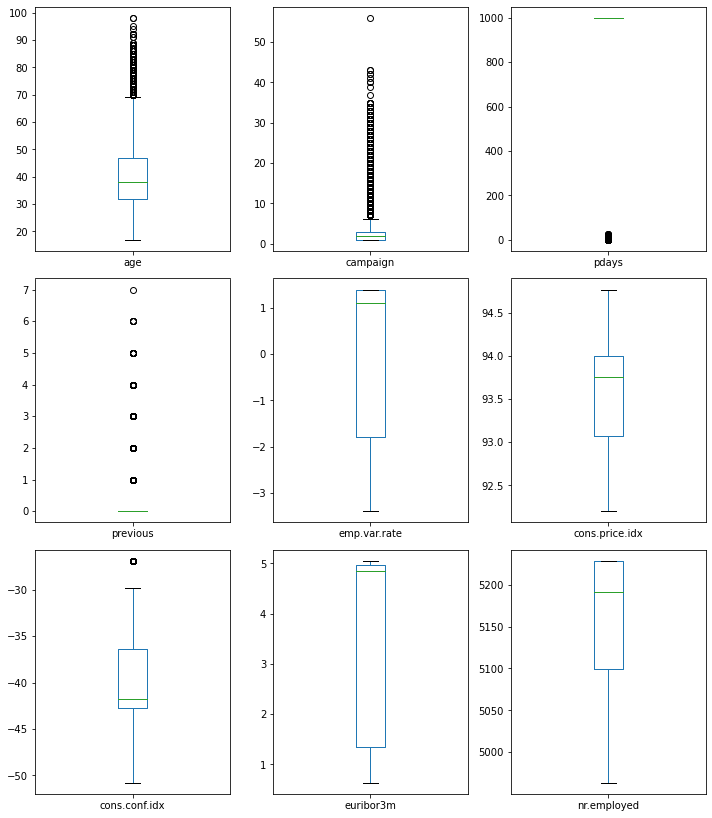

In [7]:
#outlier detection
cols = ['age', 'campaign', 'pdays',
       'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']

       
plt.figure(figsize=(10,15))

for i, col in enumerate(cols):
    plt.subplot(4,3,i+1)
    df.boxplot(col)
    plt.grid()
    plt.tight_layout()

In [8]:
#checking statistics of outlier features

df[['age', 'pdays', 'campaign', 'previous']].describe()

,age,pdays,campaign,previous
count,41176.00000,41176.000000,41176.000000,41176.000000
mean,40.02380,962.464810,2.567879,0.173013
std,10.42068,186.937102,2.770318,0.494964
min,17.00000,0.000000,1.000000,0.000000
25%,32.00000,999.000000,1.000000,0.000000
50%,38.00000,999.000000,2.000000,0.000000
75%,47.00000,999.000000,3.000000,0.000000
max,98.00000,999.000000,56.000000,7.000000


In [18]:
len(df[df['pdays'] == 999]) / len(df) * 100

96.32174419733903

In [9]:
len(df[df['campaign'] > 20])  / len(df) * 100

0.38129007188653585

In [32]:
len(df[df['campaign'] > 7])

1777

# Imputation using median

From df.describe(), the median is the 50% value, which is 2 

In [11]:
#The value which is outside the whisker
print(df['campaign'].quantile(0.95))

7.0


In [12]:
#replacing the values which are greater than the 95th percentile
df['campaign1'] = np.where(df['campaign'] > 7, 2, df['campaign'])
df[['campaign', 'campaign1']].describe()

,campaign,campaign1
count,41176.000000,41176.000000
mean,2.567879,2.118127
std,2.770318,1.383215
min,1.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,3.000000,3.000000
max,56.000000,7.000000


After median imputation, the maximum value has now become 7

# Imputation using mean

From df.describe(), the mean is 2.56

In [13]:
#replacing the values which are greater than the 95th percentile
df['campaign2'] = np.where(df['campaign'] > 7, 2.56, df['campaign'])
df[['campaign', 'campaign1','campaign2']].describe()

,campaign,campaign1,campaign2
count,41176.000000,41176.000000,41176.000000
mean,2.567879,2.118127,2.142295
std,2.770318,1.383215,1.385829
min,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,3.000000,3.000000,3.000000
max,56.000000,7.000000,7.000000


Statictics of the dataset after both median and mean imputation remains more or less the same 

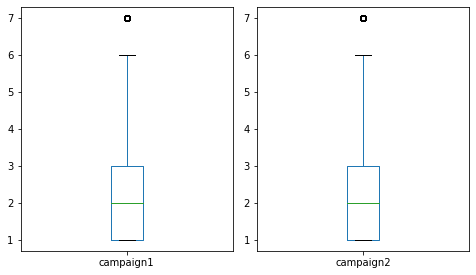

In [14]:
#outlier detection  after imputation
import matplotlib.pyplot as plt
cols = ['campaign1','campaign2']
plt.figure(figsize=(10,15))
for i, col in enumerate(cols):
    plt.subplot(4,3,i+1)
    df.boxplot(col)
    plt.grid()
    plt.tight_layout()

# EDA

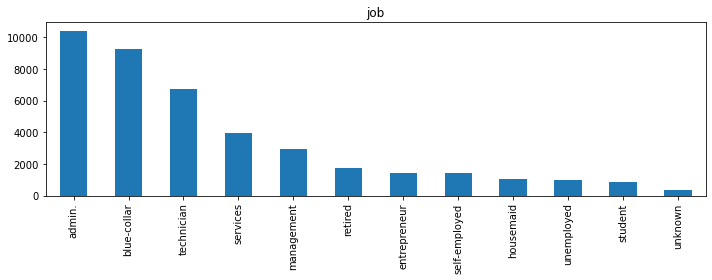

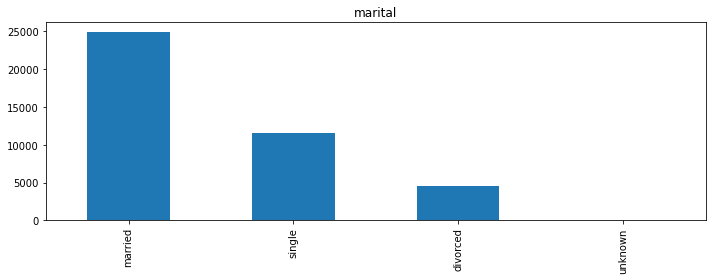

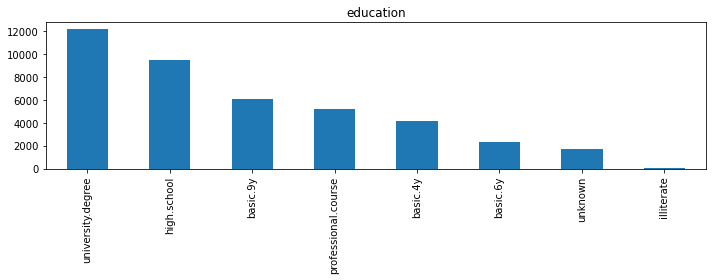

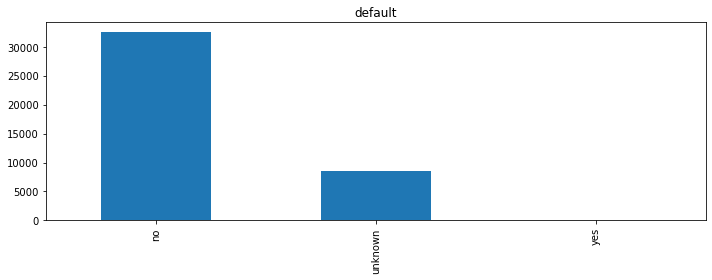

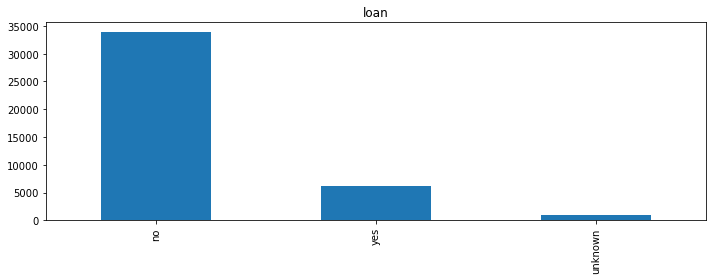

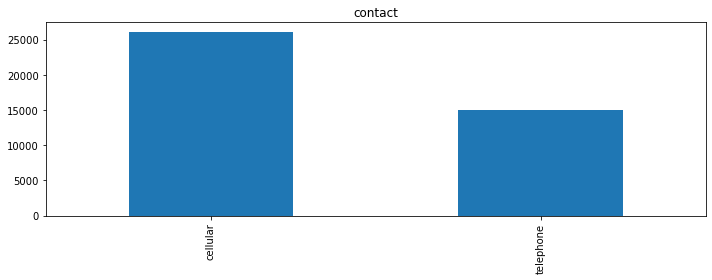

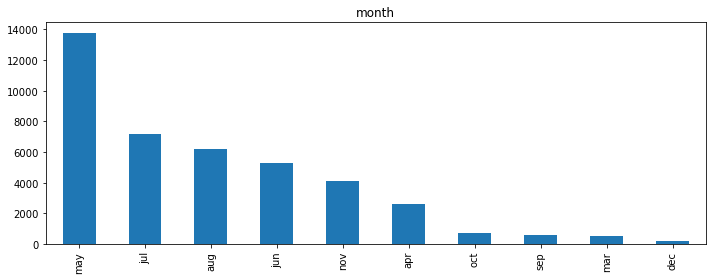

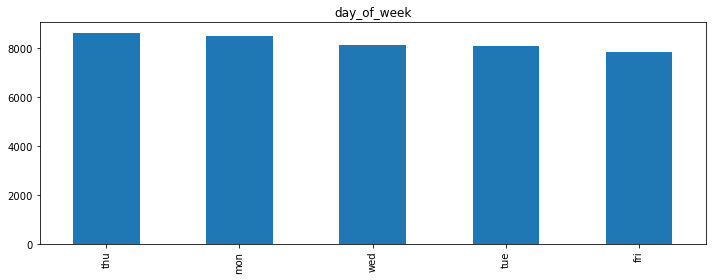

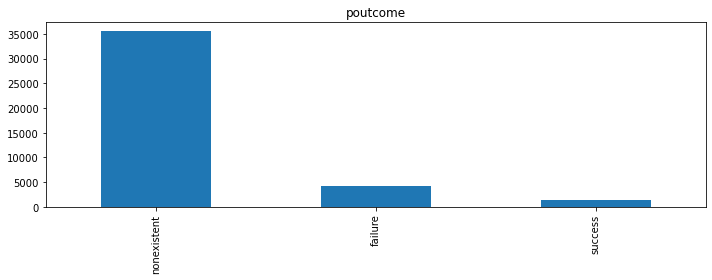

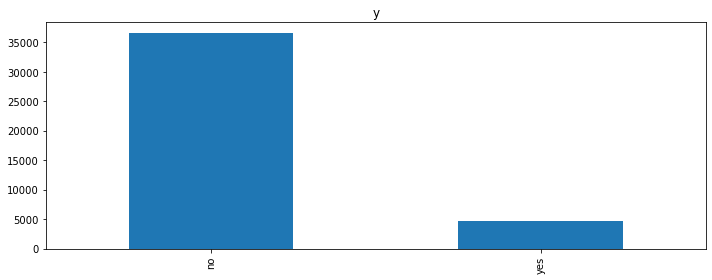

In [10]:
#exploring categorical values

categorcial_variables = ['job', 'marital', 'education', 'default', 'loan', 'contact', 'month', 'day_of_week', 'poutcome','y']
for col in categorcial_variables:
    plt.figure(figsize=(10,4))
    df[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.tight_layout()

C:\Users\archa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


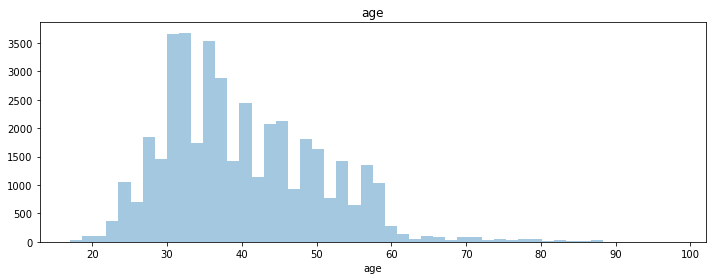

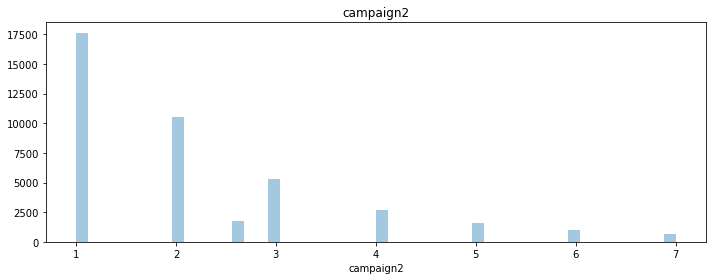

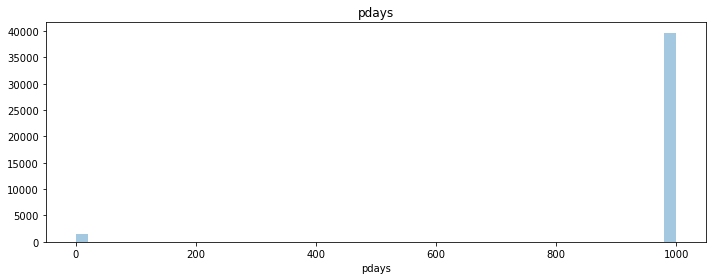

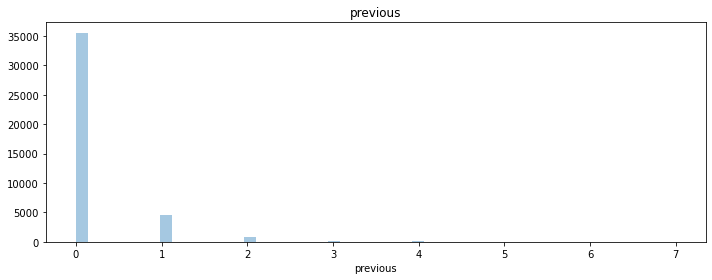

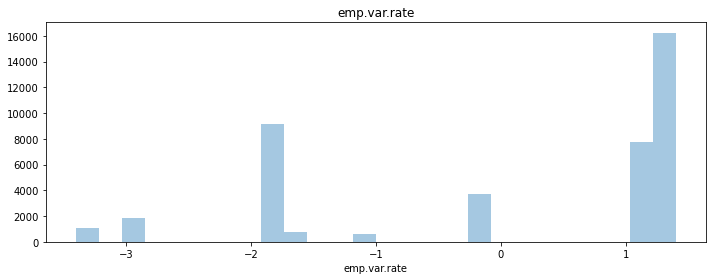

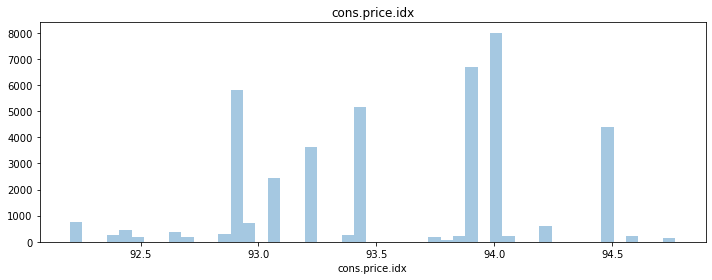

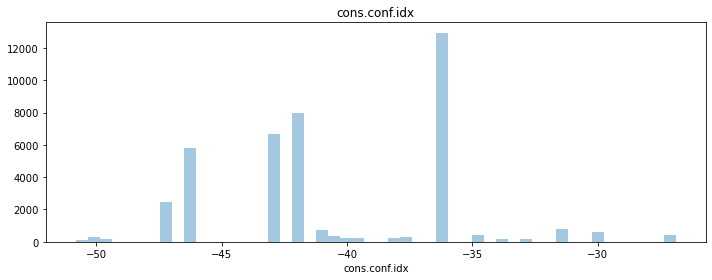

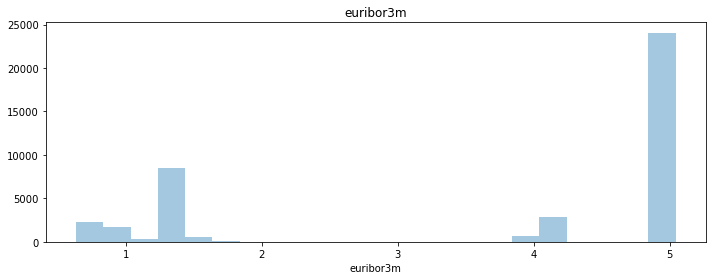

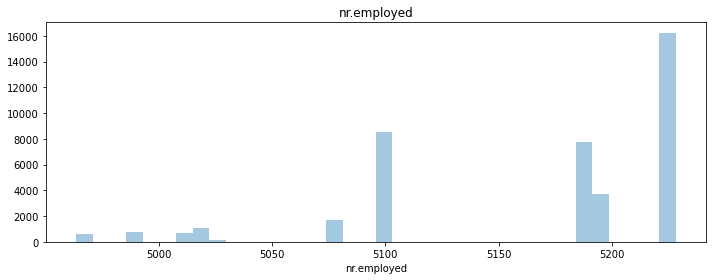

In [12]:
numerical_variables = ['age','campaign2', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx','cons.conf.idx','euribor3m',
                      'nr.employed']

for col in numerical_variables:
    plt.figure(figsize=(10,4))
    sns.distplot(df[col], kde = False)
    plt.title(col)
    plt.tight_layout()
    plt.show()

C:\Users\archa\AppData\Local\Temp/ipykernel_23140/3696153898.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


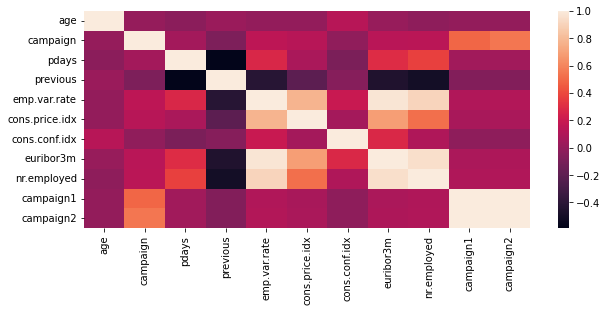

In [13]:
# correlation matrix

corr = df.corr()
plt.figure(figsize=(10,4))
sns.heatmap(corr)
plt.show()

  age_group  count
0     17-25   1665
1     26-40  22096
2     41-60  16506
3       60+    909


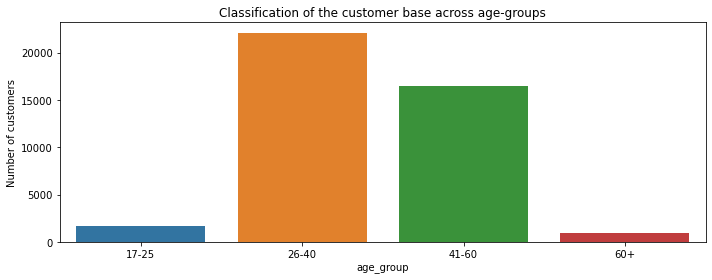

In [17]:
# Adding new age-group column to bank-additional-full data
# min = 17, max = 98 yrs
# 17-25, 26-40, 41-60, 60+ yrs
groups = df['age'].apply(lambda x: '17-25' if x<=25 else ('26-40' if x<=40 else ('41-60' if x<=60 else '60+')))
df['age_group'] = groups

age_group_counts = pd.DataFrame(df.groupby('age_group').age.count()).rename({'age':'count'}, axis = 1).reset_index()
print(age_group_counts)

plt.figure(figsize = (10,4))
sns.barplot(x = 'age_group', y = 'count', data = age_group_counts)
#plt.figure(figsize=(10,4))
plt.title('Classification of the customer base across age-groups')
plt.ylabel('Number of customers')
plt.tight_layout()
plt.show()

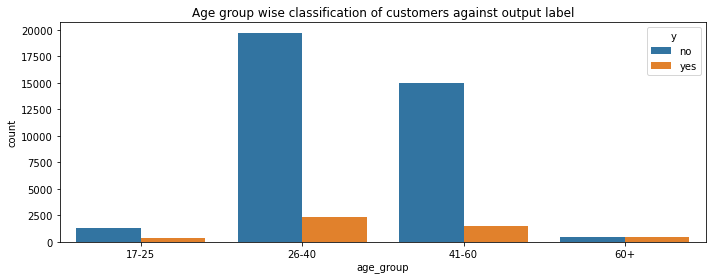

In [16]:
# Looking at relation between different age groups and the output label y

agegroup_y = pd.DataFrame(df.groupby('age_group').y.value_counts()).rename({'y':'count'}, axis = 1).reset_index()

plt.figure(figsize = (10,4))
plt.title('Age group wise classification of customers against output label')
sns.barplot(x = 'age_group', y = 'count', hue = 'y', data = agegroup_y)
plt.tight_layout()
plt.show()

In the age-groups of 26-40 and 41-60 yrs, majority of the people are not subscribed to the term deposit plan

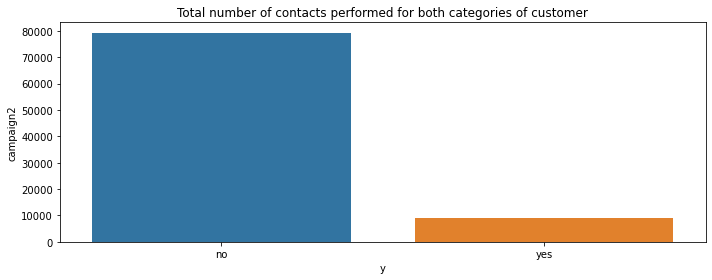

In [18]:
# Looking at relation between Number of contacts made to the customer (campaign) and the output label y

camp = pd.DataFrame(df.groupby('y')['campaign2'].sum()).reset_index()
plt.figure(figsize = (10,4))
plt.title('Total number of contacts performed for both categories of customer')
sns.barplot(x = 'y', y = 'campaign2', data = camp)
plt.tight_layout()
plt.show()

When more number of contacts is made to the customer, they haven't subscribed to the term deposit plan 

age_group
17-25     3568.52
26-40    47185.00
41-60    35779.76
60+       1677.84
Name: campaign2, dtype: float64


C:\Users\archa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


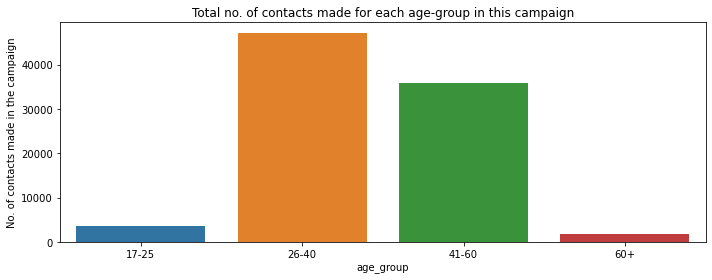

In [19]:
# Looking at relation between 'age_group' and 'campaign' that is number of contacts performed for each age group

ag_camp = df.groupby('age_group').campaign2.sum()
print(ag_camp)

plt.figure(figsize = (10,4))
plt.title('Total no. of contacts made for each age-group in this campaign')
sns.barplot(ag_camp.index, ag_camp.values)
plt.ylabel('No. of contacts made in the campaign')
plt.tight_layout()
plt.show()

The 26-40 and 41-60 age-groups witness majority of the contacts made in this campaign. These two age-groups seem to the target groups for the bank.

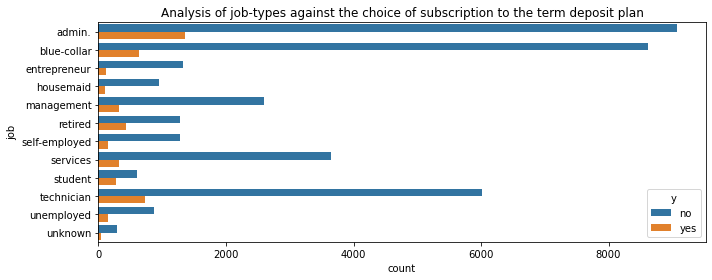

In [20]:
# Looking at relation between job and the output label y

joby = pd.DataFrame(df.groupby('job').y.value_counts()).rename({'y':'count'}, axis = 1).reset_index()
plt.figure(figsize = (10,4))
plt.title('Analysis of job-types against the choice of subscription to the term deposit plan')
sns.barplot(x = 'count', y = 'job', hue = 'y', data = joby)
plt.tight_layout()
plt.show()

Looking at the jobs, 'admin', 'blue-collar' and 'technician' are the prominent jobs and most of the customers in these jobs have rejected the term deposit plan.

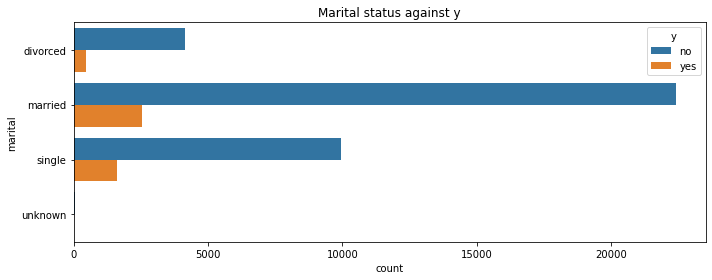

In [21]:
# Analysing marital status and the output label

marital = pd.DataFrame(df.groupby('marital').y.value_counts()).rename({'y':'count'}, axis = 1).reset_index()

# marital status vs y
plt.figure(figsize = (10,4))
plt.title('Marital status against y')
sns.barplot(x = 'count', y = 'marital', hue = 'y', data = marital)
plt.tight_layout()
plt.show()

married and single customers are the majority of the customer base and comparatively married customers have taken the term deposit

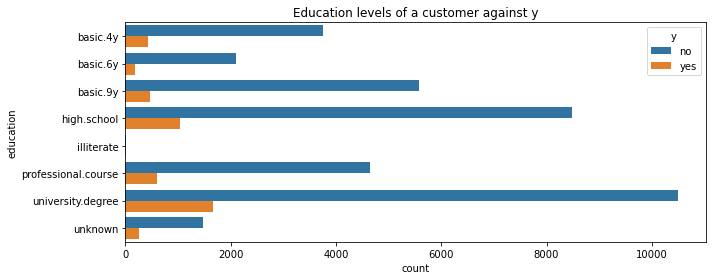

In [22]:
# Analysing the different education levels of a customer against the choice of subscription

edu = pd.DataFrame(df.groupby('education').y.value_counts()).rename({'y':'count'}, axis = 1).reset_index()

plt.figure(figsize = (10,4))
plt.title('Education levels of a customer against y')
sns.barplot(x = 'count', y = 'education', hue = 'y', data = edu)
plt.tight_layout()
plt.show()

Customers with university degree have subscribed to the term deposit more

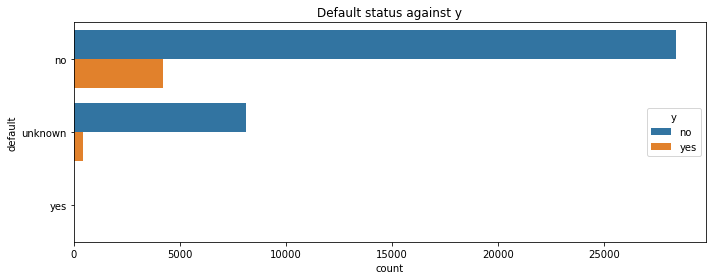

In [23]:
# Analysing the default status against the choice of subscription
default = pd.DataFrame(df.groupby('default').y.value_counts()).rename({'y':'count'}, axis = 1).reset_index()

plt.figure(figsize = (10,4))
plt.title('Default status against y')
sns.barplot(x = 'count', y = 'default', hue = 'y', data = default)
plt.tight_layout()
plt.show()

# There is no data for customers who have a default.

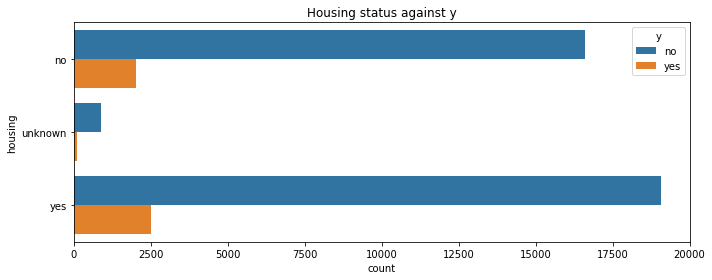

In [24]:
# Analysing housing status and y
housing = pd.DataFrame(df.groupby('housing').y.value_counts()).rename({'y':'count'}, axis = 1).reset_index()

plt.figure(figsize = (10,4))
plt.title('Housing status against y')
sns.barplot(x = 'count', y = 'housing', hue = 'y', data = housing)
plt.tight_layout()
plt.show()

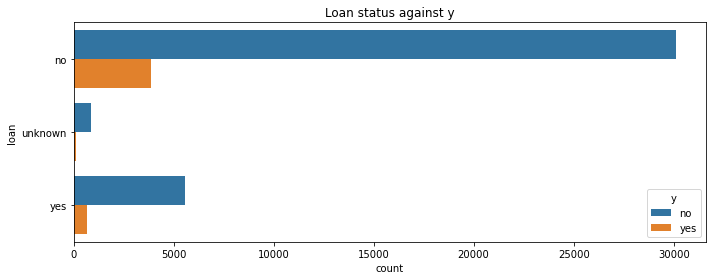

In [25]:
# analysing loan status and y
loan = pd.DataFrame(df.groupby('loan').y.value_counts()).rename({'y':'count'}, axis = 1).reset_index()

plt.figure(figsize = (10,4))
plt.title('Loan status against y')
sns.barplot(x = 'count', y = 'loan', hue = 'y', data = loan)
plt.tight_layout()
plt.show()

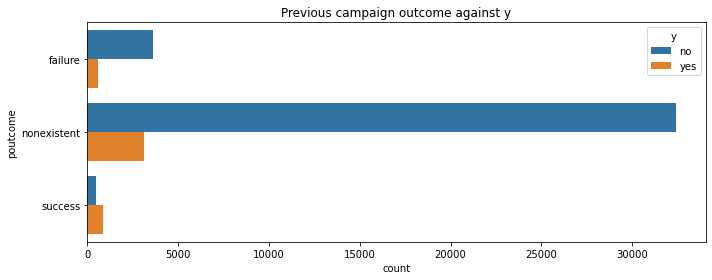

In [26]:
# analysing poutcome and y

poutcome = pd.DataFrame(df.groupby('poutcome').y.value_counts()).rename({'y':'count'}, axis = 1).reset_index()

plt.figure(figsize = (10,4))
plt.title('Previous campaign outcome against y')
sns.barplot(x = 'count', y = 'poutcome', hue = 'y', data = poutcome)
plt.tight_layout()
plt.show()    

In [17]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,campaign1,campaign2
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,1.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,1.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,1.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,1.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,1.0


# Encoding all features before performing modelling

In [21]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y', 'campaign1', 'campaign2'],
      dtype='object')

In [22]:
clean_df = df.copy()
clean_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,campaign1,campaign2
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,1.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,1.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,1.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,1.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1,1.0
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,1,1.0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,2,2.0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1,1.0


In [23]:
#dropping campaign and campaign1
clean_df.drop('campaign', axis = 1, inplace = True)
clean_df.drop('campaign1', axis = 1, inplace = True)

In [24]:
columns = ['job','marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'poutcome', 'campaign2','y']
for col in columns:
    print(col, clean_df[col].unique())

job ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital ['married' 'single' 'divorced' 'unknown']
education ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default ['no' 'unknown' 'yes']
housing ['no' 'yes' 'unknown']
loan ['no' 'yes' 'unknown']
contact ['telephone' 'cellular']
month ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week ['mon' 'tue' 'wed' 'thu' 'fri']
poutcome ['nonexistent' 'failure' 'success']
campaign2 [1.   2.   3.   4.   5.   6.   7.   2.56]
y ['no' 'yes']


1. Creating dummy values for job, marital, education, contact and poutcome

In [25]:
#convert categorical columns to dummies
cat_columns = ['job', 'marital', 'education', 'contact', 'poutcome']

for col in  cat_columns:
    clean_df = pd.concat([clean_df.drop(col, axis=1),
                            pd.get_dummies(clean_df[col], prefix=col, prefix_sep='_',
                                           drop_first=True, dummy_na=False)], axis=1)

2. Encoding month and day of week

In [26]:
clean_df['month'].replace({'may':5,'jul':7,'aug':8,'jun':6,'nov':11,'apr':4,'oct':10,'sep':9,'mar':3,'dec':12}, inplace=True)
clean_df['day_of_week'].replace({'thu':5,'mon':2,'wed':4,'tue':3,'fri':6}, inplace=True)

3. Encoding default, housing, loan and y

In [27]:
clean_df['default'].replace({'yes':1,'no':0,'unknown':-1}, inplace=True)
clean_df['housing'].replace({'yes':1,'no':0,'unknown':-1}, inplace=True)
clean_df['loan'].replace({'yes':1,'no':0,'unknown':-1}, inplace=True)
clean_df['y'].replace({'yes':1,'no':0}, inplace=True)

In [28]:
clean_df

,age,default,housing,loan,month,day_of_week,pdays,previous,emp.var.rate,cons.price.idx,...,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,contact_telephone,poutcome_nonexistent,poutcome_success
0,56,0,0,0,5,2,999,0,1.1,93.994,...,0,0,0,0,0,0,0,1,1,0
1,57,-1,0,0,5,2,999,0,1.1,93.994,...,0,0,1,0,0,0,0,1,1,0
2,37,0,1,0,5,2,999,0,1.1,93.994,...,0,0,1,0,0,0,0,1,1,0
3,40,0,0,0,5,2,999,0,1.1,93.994,...,1,0,0,0,0,0,0,1,1,0
4,56,0,0,1,5,2,999,0,1.1,93.994,...,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,0,1,0,11,6,999,0,-1.1,94.767,...,0,0,0,0,1,0,0,0,1,0
41184,46,0,0,0,11,6,999,0,-1.1,94.767,...,0,0,0,0,1,0,0,0,1,0
41185,56,0,1,0,11,6,999,0,-1.1,94.767,...,0,0,0,0,0,1,0,0,1,0
41186,44,0,0,0,11,6,999,0,-1.1,94.767,...,0,0,0,0,1,0,0,0,1,0


# Modelling using Machine Learning

In [29]:
X = clean_df.drop(['y'],axis=1)
y = clean_df.y

In [30]:
## Train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =42)

In [31]:
print("X and Y train shape:", X_train.shape, y_train.shape)
print("X and Y test shape:", X_test.shape, y_test.shape)

X and Y train shape: (28823, 38) (28823,)
X and Y test shape: (12353, 38) (12353,)


In [32]:
#every feature is calculated with different units
#to make the algorithm converge faster(to reach global minimum) using gradient decent,
#all the datapoints should be normalized or standardize to the same scale

#Standardize the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
#use transform for test
X_test = scaler.transform(X_test)

In [33]:
#creating the objects for the models 
#1. Logistic Regression
logreg = LogisticRegression()

#2. Decision Tree
dt=DecisionTreeClassifier()

#3 Naive Bayes
nb=BernoulliNB()

#4. Random Forest
rf=RandomForestClassifier()

#5. Gradient Boosting
gb=GradientBoostingClassifier()

cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'Naive Bayes', 3: 'Random Forest', 4: 'Gradient Boosting'}
cv_models=[logreg,dt,nb,rf,gb]


for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, X, y, cv=10, scoring ='accuracy').mean()*100))

Logistic Regression Test Accuracy: 84.4393294343465
Decision Tree Test Accuracy: 27.85230525818215
Naive Bayes Test Accuracy: 82.22150058812751
Random Forest Test Accuracy: 45.307791654570075
Gradient Boosting Test Accuracy: 53.4335246020864


# Logistic Regression has perfomed the best out of all the classifiers

# Performing hyperparameter tuning for Logistic regression

In [34]:
param_grid = {'C': np.logspace(-4, 4, 50),
             'penalty':['l1', 'l2'], 'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],'max_iter':range(80,140)}
clf = GridSearchCV(LogisticRegression(random_state=0), param_grid,cv=5, verbose=0,n_jobs=-1)
best_model = clf.fit(X_train,y_train)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test,y_test)*100)

LogisticRegression(C=0.3906939937054613, max_iter=80, penalty='l1',
                   random_state=0, solver='saga')
The mean accuracy of the model is: 89.60576378207723


In [81]:
#Training the model with the best parameters

logreg = LogisticRegression(C=0.18420699693267145, random_state=0)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)*100))

Accuracy of logistic regression classifier on test set: 89.57


In [84]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",confusion_matrix)
print("Classification Report:\n",classification_report(y_test, y_pred))

Confusion Matrix:
 [[10779   150]
 [ 1138   286]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     10929
           1       0.66      0.20      0.31      1424

    accuracy                           0.90     12353
   macro avg       0.78      0.59      0.63     12353
weighted avg       0.88      0.90      0.87     12353



* Confusion matrix results tell us that we have 10779 + 150 Correct predictions and 1138+286 incorrect

* Classification report shows precision as 90% which is the ability of a classification model to identify only the relevant data points 

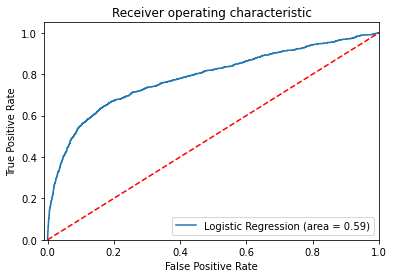

In [85]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()